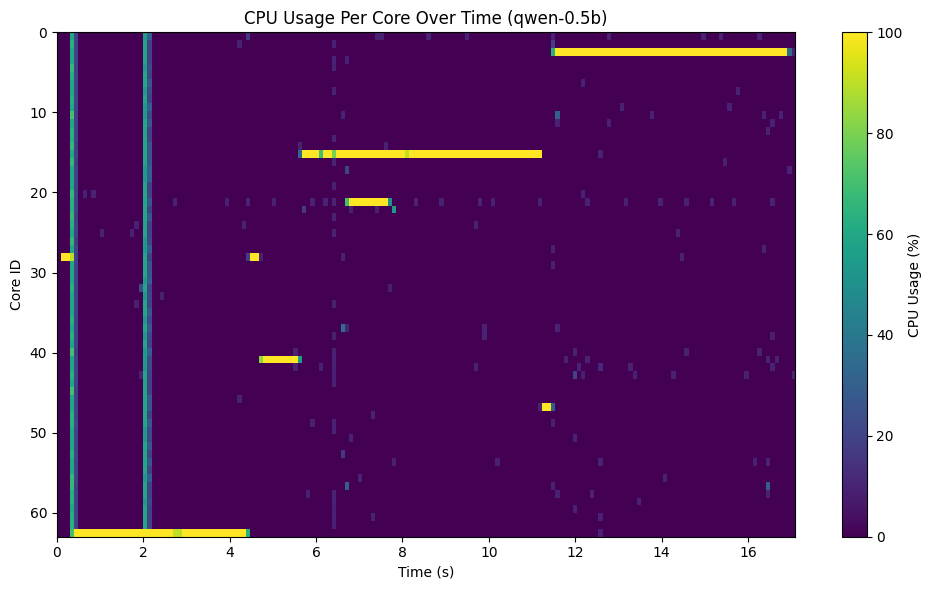

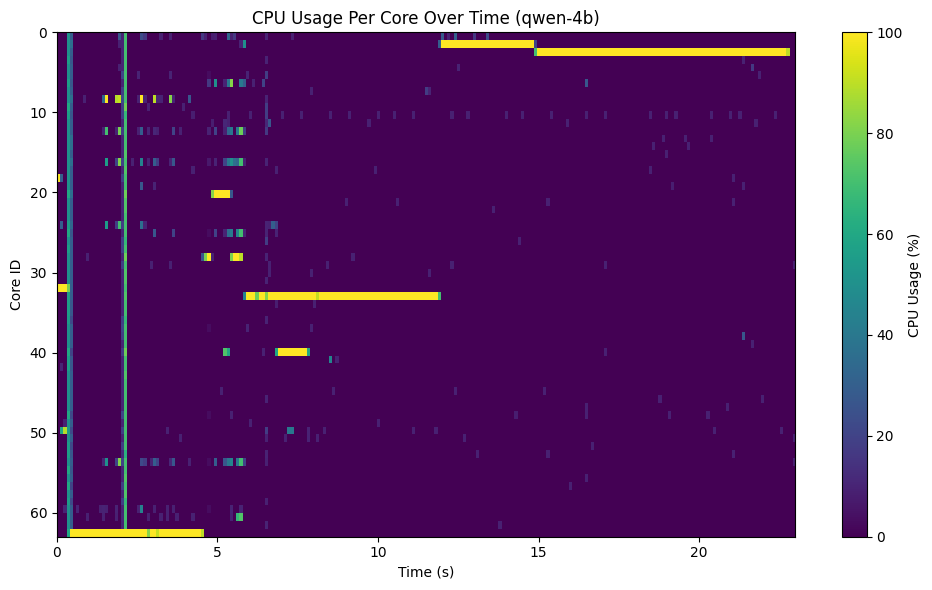

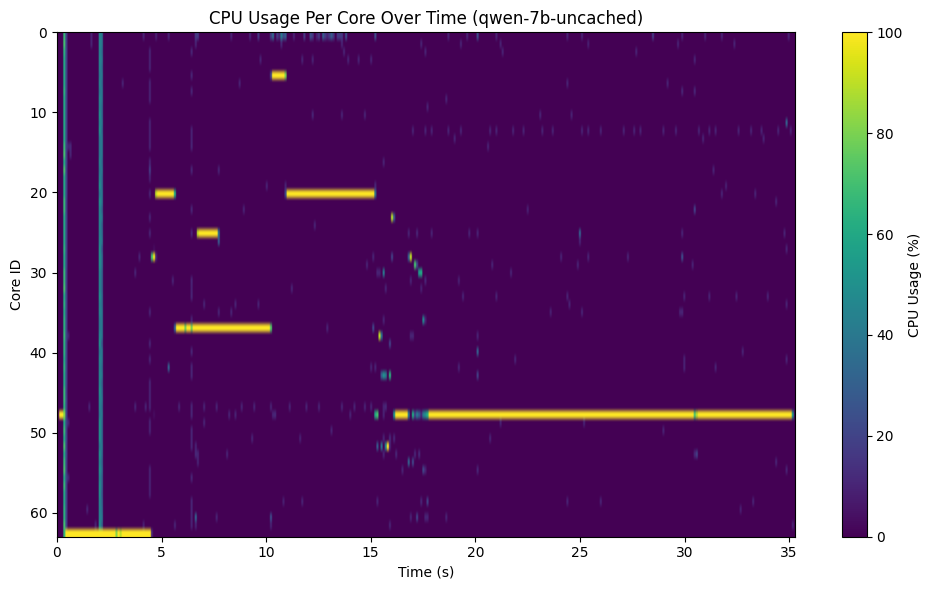

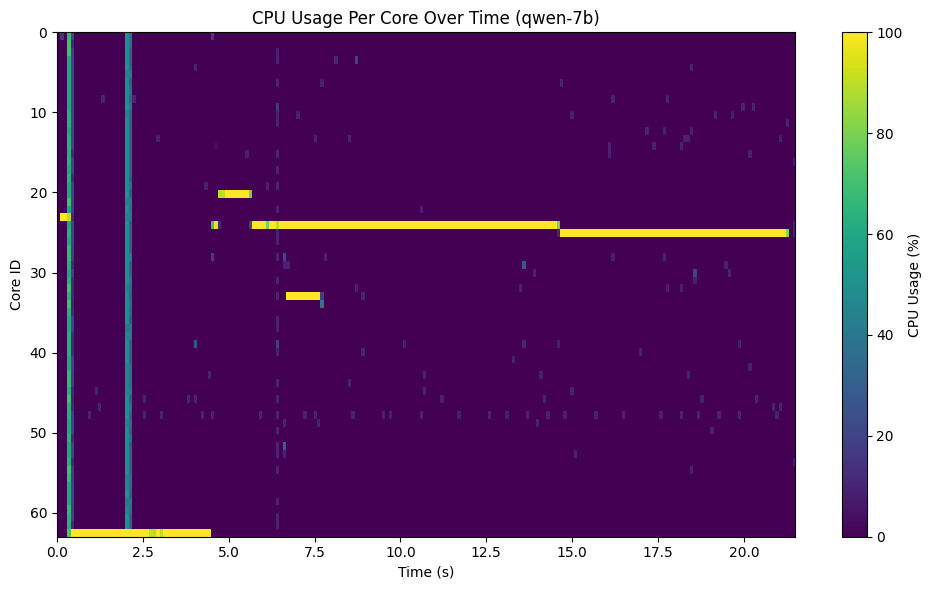

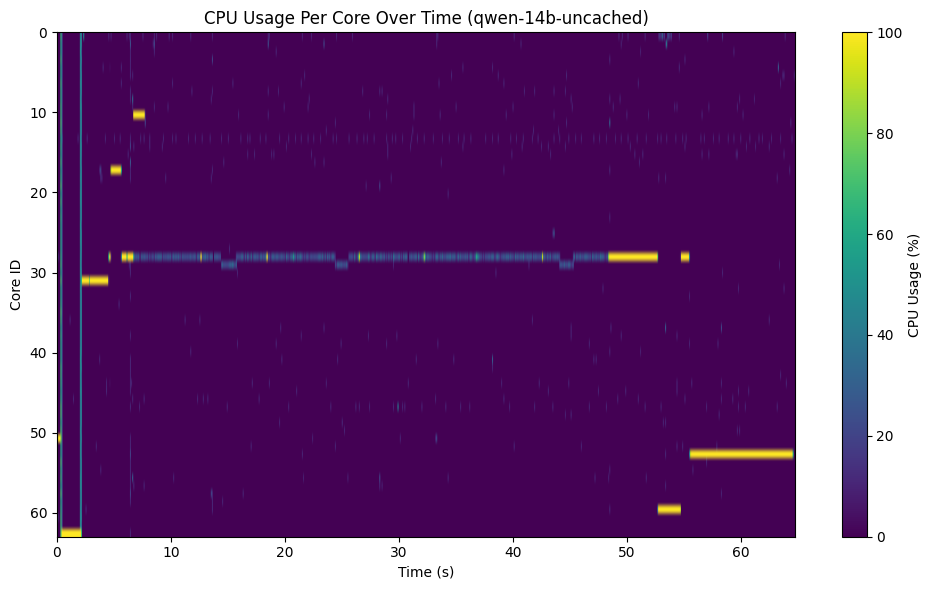

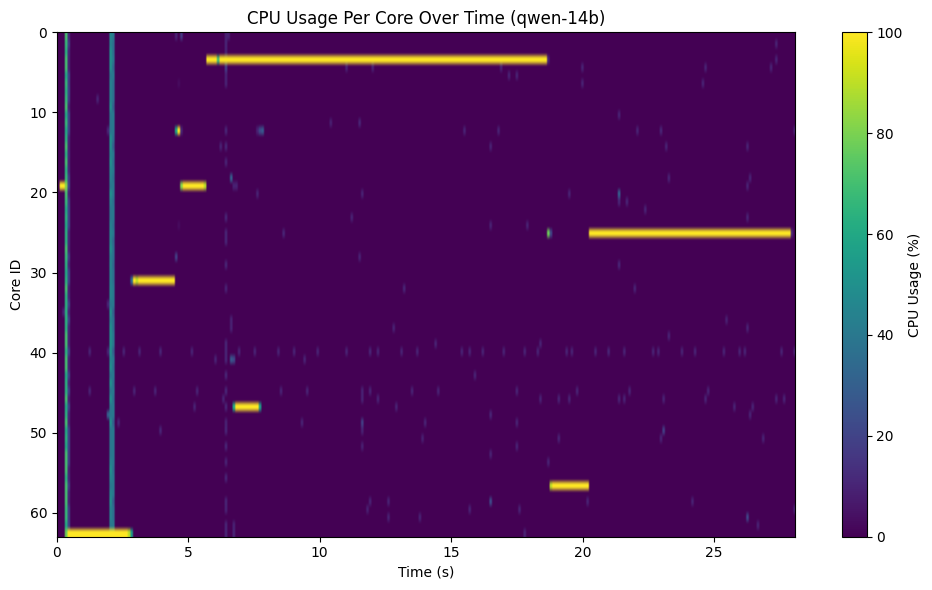

In [23]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

def plot_cpu_usage(samples, core_data, model_name):
    """Draw heatmap of CPU usage per core over time."""
    core_data = np.array(core_data)  # shape: (cores, samples)

    plt.figure(figsize=(10, 6))
    im = plt.imshow(core_data, aspect="auto", cmap="viridis",
                    extent=[samples[0], samples[-1], core_data.shape[0]-1, 0],
                    vmin=0, vmax=100)

    plt.colorbar(im, label="CPU Usage (%)")
    plt.title(f"CPU Usage Per Core Over Time ({model_name})")
    plt.xlabel("Time (s)")
    plt.ylabel("Core ID")
    plt.tight_layout()
    plt.show()

for model_name in ["qwen-0.5b", "qwen-4b", "qwen-7b-uncached", "qwen-7b", "qwen-14b-uncached", "qwen-14b"]:
    file = f"cpu_usage_{model_name}.json"
    if file.endswith(".json"):
        with open(file, "r") as f:
            usage_log = json.load(f)

        samples = [x/10 for x in range(len(usage_log))]
        core_data = list(zip(*[entry for entry in usage_log]))

        plot_cpu_usage(samples, core_data, model_name)